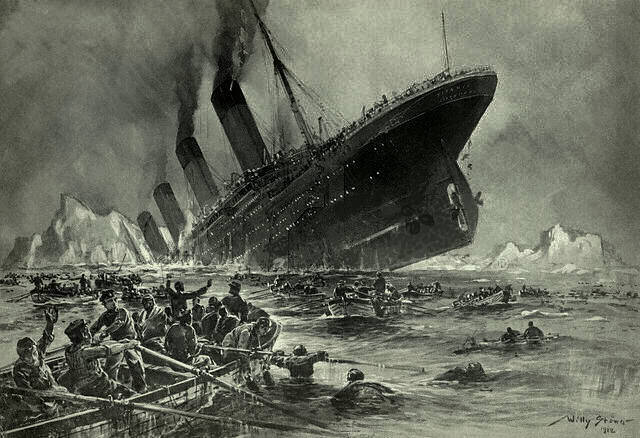

In [59]:
from IPython.display import Image

Embed = Image('http://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg')
Embed

### BACKGROUND

Description from [Kaggle]('http://www.kaggle.com/c/titanic-gettingStarted') website:
Machine Learning from Titanic Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

From [Wikipedia]('http://en.wikipedia.org/wiki/RMS_Titanic'):
>The Titanic reportedly struck an iceberg at 11:40 pm ship's time. The majority of its 2,224 passengers and crew had likely retired to their respective cabins for the evening by that time. Those on the upper decks had a shorter journey to the lifeboats, and possibly access to more timely and accurate information about the impending threat. 

####Thus, any data relating to one's location on the ship could prove helpful to survival predictions. 
>Below is a cross-section of the Titanic: 

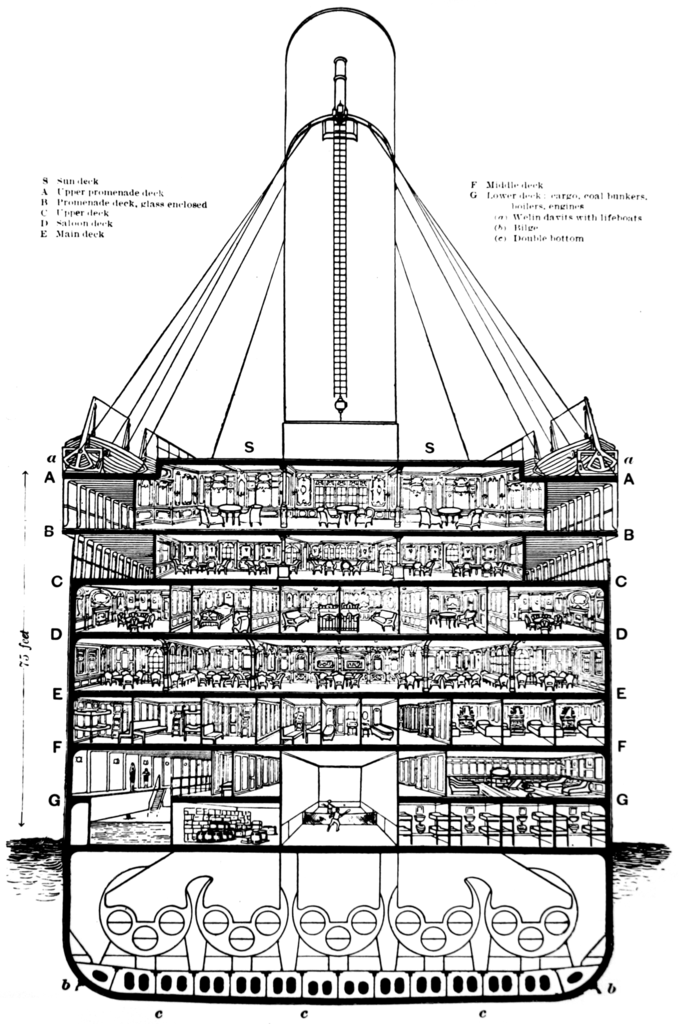

In [60]:
from IPython.display import Image
Image(filename='../assets/titanic_deck_topview.png')

In [20]:
import numpy 
import pandas 
import scipy
import matplotlib
import brewer2mpl
import seaborn 
import sklearn
print numpy.__version__
print pandas.__version__
print scipy.__version__
print matplotlib.__version__
print brewer2mpl.__version__
print seaborn.__version__
print sklearn.__version__


1.10.1
0.17.1
0.16.0
1.5.0
1.4.1
0.7.1
0.17


In [7]:
#Importing all the libraries needed

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import brewer2mpl
import seaborn as sns

In [91]:
# Setting up better defaults for matplotlib
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_colors = brewer2mpl.get_map('Dark2', 'Qualitative', 7).mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [63]:
# Load data
df=pd.read_csv("../data/titanic_training.csv")

In [64]:
# Look at size of the data
df.shape

(891, 11)

In [65]:
# Review first 5 columns
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


>From above table, we see that there are missing values, we need to quickly review which columns
have how many missing values

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


##Missing Values

In [67]:
# Missing values = total - non-null(obtained from df.info)

print "\nNo.of missing values for column cabin:", 891-204
print "No.of missing values for column age:", 891-714


No.of missing values for column cabin: 687
No.of missing values for column age: 177


We should understand if the columns cabin and age correlate with survival prediction or not. If there is not high correlation we can drop the columns. If there is high correlation we have to look into replacing the null values.
+ the [overall survival]('https://www.kaggle.com/c/titanic-gettingStarted/forums/t/2955/how-do-you-cope-with-missing-values/23981') rate is 38%

Cabin
+ for those who have Cabin info(204 in total), the survival rate is 136 / 204 = 0.66
+ for those who don't have Cabin info(687 in total), the survival rate is 206 / 687 = 0.3

Age
+ for those who have Age info(714 in total), the survival rate is 290 / 714 = 0.40
+ for those who don't have Age info(177 in total), the survival rate is 52 / 177 = 29%

The above preliminary numbers show there might be a correlation, we have to figure out what is the best way to replace the missing values

##Missing Values: Cabin

In [112]:
# let's first take a quick look if 'cabin' effected survival chance
df["deck"] = df.cabin.str[0]
df.deck.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

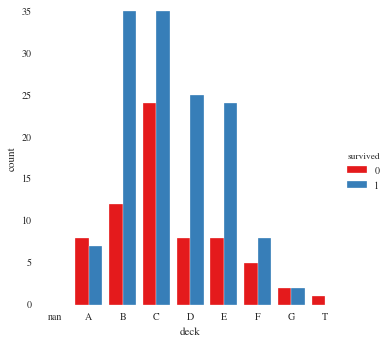

In [113]:
sns.factorplot("deck", hue="survived", data=df, palette="Set1")


+ If passenger belonged to A or G, survival chances are roughly 50/50
+ If passenger belonged to B or D or E, survival chances are higher

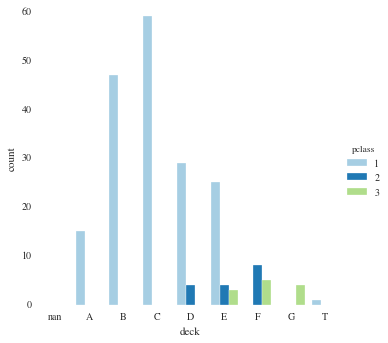

In [114]:
# let's see if pclass is representative of cabin and if so, we might be ok not replacing cabin values.
sns.factorplot("deck", hue="pclass", data=df, palette="Paired")

> + Cabin A,B,C are exclusively pclass 1
+ Cabin G is exclusively pclass 3
+ Cabin D,E,F has a mix of pclass

We have to combine pclass, cabin and survived to see the relationship between all 3 variables

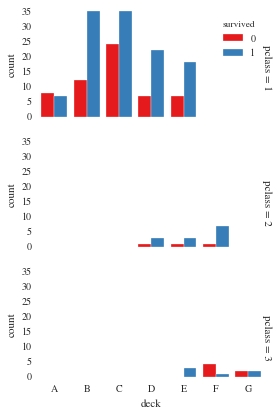

In [115]:
sns.factorplot("deck", data=df, row="pclass", hue='survived', x_order=list("ABCDEFG"),
               margin_titles=True, aspect=2, size=2, palette="Set1", legend_out=False);

> There are a few interesting observations here:
+ even though passenger is in pclass=1 his surival chances are lower if he is in cabin A  instead of cabin B

######Let's verify this with survival counts

In [25]:
df[(df.deck=='A')&(df.pclass==1)].survived.value_counts()

0    8
1    7
dtype: int64

In [26]:
df[(df.deck=='B')&(df.pclass==1)].survived.value_counts()

1    35
0    12
dtype: int64


#####Let's take a look at how other variables are distributed among different cabins.

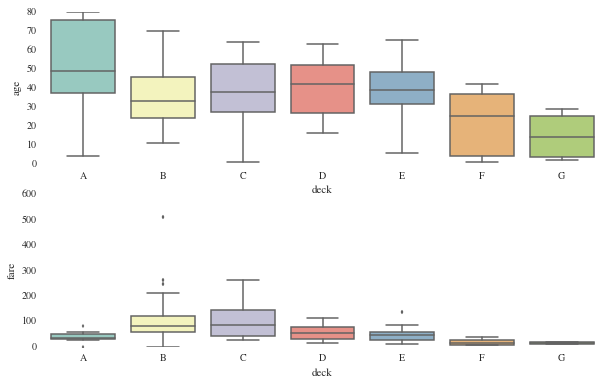

In [85]:
plt.subplot(211)
sns.boxplot(df.age, df.deck, color="Set3")
plt.subplot(212)
sns.boxplot(df.fare, df.deck, color="Set3")

> Passengers in Cabin A paid the least amount and survived the least. 
##### May be they are crew members

>According to [Wikipedia]('http://en.wikipedia.org/wiki/RMS_Titanic'):
Titanic had around 885 crew members on board for her maiden voyage. Like other vessels of her time, she did not have a permanent crew, and the vast majority of crew members were casual workers who only came aboard the ship a few hours before she sailed from Southampton.

##### Let's look at ticket and embarked if that gives us further information on cabin.

In [28]:
df[(df.deck=='A')] [['ticket','name','embarked','survived']].head(20)

,ticket,name,embarked,survived
23,113788,"Sloper, Mr. William Thompson",S,1
96,PC 17754,"Goldschmidt, Mr. George B",C,0
174,17764,"Smith, Mr. James Clinch",C,0
185,113767,"Rood, Mr. Hugh Roscoe",S,0
209,112277,"Blank, Mr. Henry",C,1
284,113056,"Smith, Mr. Richard William",S,0
445,33638,"Dodge, Master. Washington",S,1
475,110465,"Clifford, Mr. George Quincy",S,0
556,11755,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",C,1
583,13049,"Ross, Mr. John Hugo",C,0


##### let's look at what cabin value has

In [29]:
df['cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

>Here we see values like 'C23 C25 C27' in the same row under the column cabin. This leads us to explore slight detour. Does this mean there are more than one passenger accounted on the same ticket. If so, we have to make sure that each passenger on the ticket is given a single row in our dataframe so that the information about the passenger such as age, sex and survived are represented accurately. 

In [30]:
# lets print the entire dataframe to see what is going on.
df


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,C
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,NaN
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,E
7,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,NaN
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,NaN
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,NaN


>Looking at Row 27 where column cabin shows 'C23 C25 C27': A 19 yr old male traveled with 3 siblings/spouses and 2 parents/children. Also this makes us wonder if the price 263.00 is the total fare for 6 people. 

In [31]:
# lets very quickly take a look at the rows where cabin column contains more than one cabin no.
df['cabin'] = df['cabin'].astype('str')
df[df['cabin'].str.len() > 4] 

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,deck
27,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S,C
75,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S,F
88,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S,C
97,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C,D
118,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C,B
128,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,F
297,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,C
299,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C,B
305,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,C
311,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,B


>We see that the family members travelling with the male in row 27 are later represented in rows 88 and 438. This ensures each row is representing a single passenger. However, this also shows us that cabin column does not represent unique value w.r.to each passenger and it might be better to remove from the dataframe. 

>However we came across another observations that will improve quality of our data. Fare represented here is the total fare including passengers and their family. Fare per passenger might be a better variable for our analysis. We will get back to this later. 

>There is no further information about 'cabin' available within this data frame to help us. Lets search world web for more info.

In [32]:
from IPython.display import HTML
HTML('<iframe src=http://www.encyclopedia-titanica.org/cabins.html?useformat=mobile width=700 height=350></iframe>')

>Briefly reading through this webpage, 
+ we can see cabins are assigned on the go
+ It's also good to mention that cabin A are near the deck and cabins F are near the keel (where the ship hit the iceberg - on the right side near the prow).

Due to lack of further information, at this time we will simply replace cabin missing values with a value to represent that information is missing. We know enough to not drop the null values. We might revisit cabin column if accuracy accomplished by our model is not adequate.

In [33]:
#replacing values for cabin

df['deck'][df.deck.isnull()] = 'U'
df=df.drop(['cabin'], axis=1)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


## Missing Values: Age
>A common approach to this type of situation is to replace with the average of the available values. In this case, that would mean replacing 177 missing Age values with 29.7.Taking such an approach would be fine if only a small fraction of the age values were missing. However, with missing values accounting for 20 percent of all age values in a relatively small data set (<900 records), it is better to search for a more refined method of imputation. 

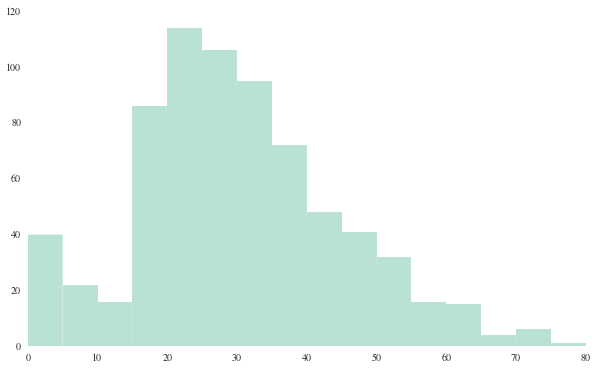

In [34]:
# Let's first look at the distribution of age
df.age.dropna().hist(bins=16, range=(0,80), alpha = .3)
plt.grid(axis = 'x', color ='white', linestyle='-')

In [35]:
# lets look at mean and median
df.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


>Mean age of all passengers is 29.6991176  maybe the median would be better? (to reduce the influence of a few rare 70- and 80-year olds?) The Age histogram did seem positively skewed.
>For now let's decide to be more sophisticated, that we want to use the age that was typical in each passenger class. And decide that the median might be better.[(source)]('https://www.kaggle.com/c/titanic-gettingStarted/details/getting-started-with-python-ii')

>Passengers in the upper classes (first and second) would tend to be wealthier, and in that period of U.S. history, acquiring wealth usually required a good deal of time (no dot-com kings in their 20s were aboard the Titanic on her maiden voyage). There are no missing values in Pclass, so we could replace the missing age for, say, a third class passenger with the average or median of the available ages for those in Pclass="3". Doing so would be an improvement over assigning 29.7 to all Age missings.[(source)]('https://github.com/wehrley/wehrley.github.io/blob/master/SOUPTONUTS.md')

In [36]:
df['gender'] = df['sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [37]:
#Let's build another reference table to calculate what each of these medians are:
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['gender'] == i) & \
                              (df['pclass'] == j+1)]['age'].dropna().median()

In [38]:
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [39]:
df['ageFill'] = df['age']

In [40]:
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.age.isnull()) & (df.gender == i) & (df.pclass == j+1),\
                'ageFill'] = median_ages[i,j]

In [41]:
df[ df['age'].isnull() ]  [['gender','pclass','age','ageFill']].head(10)

,gender,pclass,age,ageFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [42]:
#Let's also create a feature that records whether the Age was originally missing.
df['ageIsNull'] = pd.isnull(df.age).astype(int)

In [43]:
# let's look at our new columns: Gender, AgeFill, AgeIsNull... 
df[['gender','age','ageFill']].describe() 

,gender,age,ageFill
count,891.000000,714.000000,891.000000
mean,0.647587,29.699118,29.112424
std,0.477990,14.526497,13.304424
min,0.000000,0.420000,0.420000
25%,0.000000,20.125000,21.500000
50%,1.000000,28.000000,26.000000
75%,1.000000,38.000000,36.000000
max,1.000000,80.000000,80.000000


In [44]:
df = df.drop(['age','ageIsNull'], axis=1)

##Data Value Validation:Fare
>While there are no missing Fare values, a summary does show at least one Fare=0

In [45]:
df[df['fare']<5] 

,survived,pclass,name,sex,sibsp,parch,ticket,fare,embarked,deck,gender,ageFill
179,0,3,"Leonard, Mr. Lionel",male,0,0,LINE,0.0000,S,U,1,36
263,0,1,"Harrison, Mr. William",male,0,0,112059,0.0000,S,B,1,40
271,1,3,"Tornquist, Mr. William Henry",male,0,0,LINE,0.0000,S,U,1,25
277,0,2,"Parkes, Mr. Francis ""Frank""",male,0,0,239853,0.0000,S,U,1,30
302,0,3,"Johnson, Mr. William Cahoone Jr",male,0,0,LINE,0.0000,S,U,1,19
378,0,3,"Betros, Mr. Tannous",male,0,0,2648,4.0125,C,U,1,20
413,0,2,"Cunningham, Mr. Alfred Fleming",male,0,0,239853,0.0000,S,U,1,30
466,0,2,"Campbell, Mr. William",male,0,0,239853,0.0000,S,U,1,30
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,0,0,239854,0.0000,S,U,1,30
597,0,3,"Johnson, Mr. Alfred",male,0,0,LINE,0.0000,S,U,1,49


In [46]:
# first we set those fares of 0 to nan
df.fare = df.fare.map(lambda x: np.nan if x==0 else x)

# calculate the mean fare for each class
class_mean = df.pivot_table('fare', rows='pclass', aggfunc='mean')

# replace fare with mean fare for class where fare value was zero
df.fare = df[['fare', 'pclass']].apply(lambda x: class_mean[x['pclass']] if pd.isnull(x['fare']) else x['fare'], axis=1 )


//anaconda/lib/python2.7/site-packages/pandas/util/decorators.py:81: FutureWarning: the 'rows' keyword is deprecated, use 'index' instead
  warnings.warn(msg, FutureWarning)
//anaconda/lib/python2.7/site-packages/pandas/core/index.py:648: FutureWarning: scalar indexers for index type Int64Index should be integers and not floating point
  type(self).__name__),FutureWarning)


## Creating a new column: fare_per_passenger

> when we were investigating 'cabin' we found out that ticket price included group price, we will be better off creating a new variable representative of price per person

In [47]:
df.pclass.value_counts()

3    491
1    216
2    184
dtype: int64

In [48]:
df['family_size'] = df['sibsp'] + df['parch']
df['fare_per_p'] = df['fare'] / (df['family_size'] + 1)

In [49]:
df[['fare','fare_per_p']].describe()

,fare,fare_per_p
count,891.000000,891.000000
mean,32.893375,20.605542
std,49.700581,36.086873
min,4.012500,1.132143
25%,7.925000,7.589600
50%,14.500000,8.662500
75%,31.275000,24.500000
max,512.329200,512.329200


##Missing Value:Embarked
>Embarked feature also had at least one missing value.

In [50]:
#In cases of categorical variables, the most common value can be applied rather than the statistical mean.
#Replace missing values with most common port
df.embarked[df.embarked.isnull() ] = df.embarked.dropna().mode().values

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [51]:
df.dtypes
df.dtypes[df.dtypes.map(lambda x: x=='object')]

name        object
sex         object
ticket      object
embarked    object
deck        object
dtype: object

In [52]:
df = df.drop(['name', 'ticket'], axis=1) 
df = df.dropna()

In [53]:
df['age*Class'] = df.ageFill * df.pclass

##Exploratory Data Visualization

Let's look at overall distribution of the cleaned data

In [55]:
df.pclass.value_counts()sns.pairplot(df, hue="survived")

3    491
1    216
2    184
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ccd7950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10dc22a90>]], dtype=object)

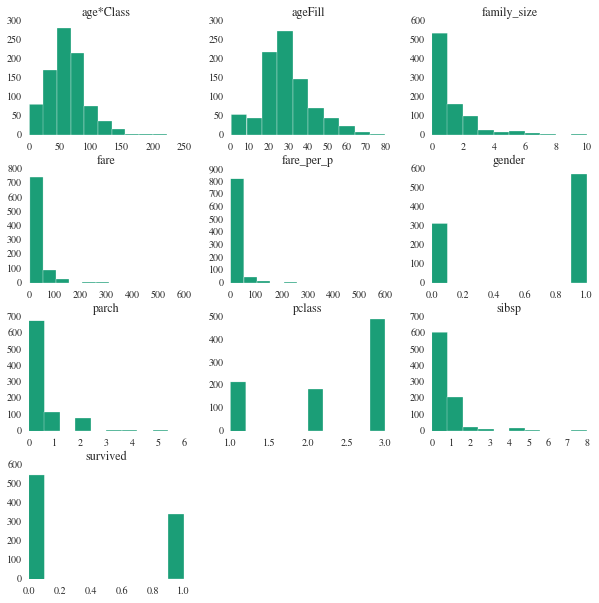

In [43]:
df.hist(figsize=(10,10))

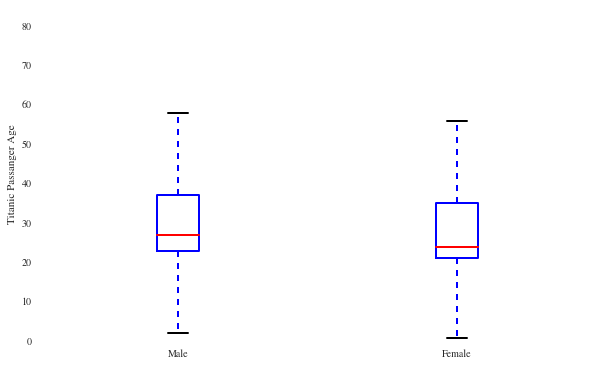

In [44]:
male_age = df.ageFill[df.sex == 'male']
female_age = df.ageFill[df.sex == 'female']
                       
plt.boxplot([male_age, female_age])
plt.ylabel("Titanic Passanger Age")
plt.xticks([1, 2], ["Male", "Female"])
plt.ylim(0, 85)
remove_border()

//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


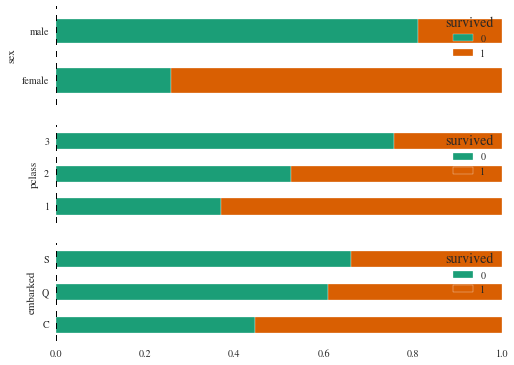

In [45]:
# code in this namespace is adapted from https://triangleinequality.wordpress.com/2013/05/25/plotting-with-python/

def proportionSurvived(discreteVar):
    by_var = df.groupby([discreteVar,'survived'])
    table = by_var.size().unstack()
    normedtable = table.div(table.sum(1), axis=0)
    return normedtable

discreteVarList = ['sex', 'pclass', 'embarked']

fig1, axes1 = plt.subplots(3,1,figsize=(8,6))

for i in range(3):
    var = discreteVarList[i]
    table = proportionSurvived(var)
    table.plot(kind='barh', stacked=True, ax=axes1[i])

fig1.show()


##Logistic Regression
###Building Model

In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Patsy brought a formula interface to Python, and it got integrated into a number components of statsmodels. statsmodels talks to pandas dataframes via an expressive “formula” description of your model.[source]('http://slendermeans.org/ml4h-ch2-p2.html')

Formula can be created using transformation on variables as in this example:
formula = ('totalwgt_lb ~ agepreg + C(race) + nbrnaliv>1 + paydu==1 + totincr)

Different data types can be used as illustrated in the above example: 
agepreg: continuous
race: categorical
nbrnaliv>1: boolean
paydu==1: boolean
totincr: interval 

####creating formula using the variables we think are correlated with survival (from Exploratory data analysis)

In [48]:
df.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,deck,gender,ageFill,family_size,fare_per_p,age*Class
0,0,3,male,1,0,7.2500,S,U,1,22,1,3.62500,66
1,1,1,female,1,0,71.2833,C,C,0,38,1,35.64165,38
2,1,3,female,0,0,7.9250,S,U,0,26,0,7.92500,78
3,1,1,female,1,0,53.1000,S,C,0,35,1,26.55000,35
4,0,3,male,0,0,8.0500,S,U,1,35,0,8.05000,105


In [49]:
# create a results dictionary to hold our regression results for easy analysis later        
results = {} 

# For our purposes we create a simple formula for now
formula = 'survived ~ C(pclass) + C(sex) + C(deck) + ageFill + fare_per_p + family_size  + C(embarked)'

# instantiate our model
model = smf.logit(formula, df)

# fit our model to the training data
res = model.fit()

# save the result for outputing predictions later
results['Logit'] = [res, formula]


Optimization terminated successfully.
         Current function value: 0.430104
         Iterations 6


Optimization terminated successfully.
         Current function value: 0.430104
         Iterations 6


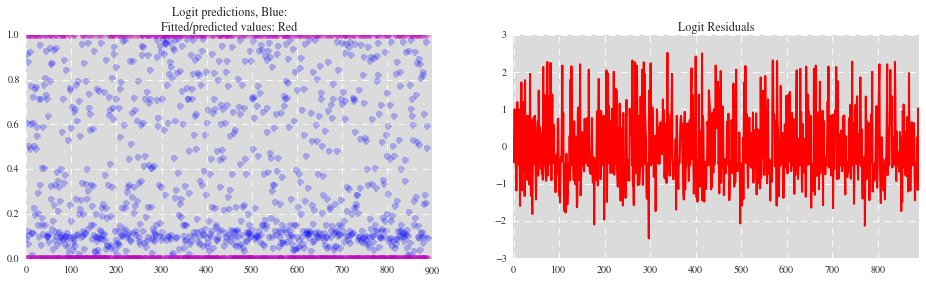

In [50]:
from patsy import dmatrices

# create a regression freindly dataframe using patsy's dmatrices function
y,x = dmatrices(formula, data=df, return_type='dataframe')

# instantiate our model
model = sm.Logit(y,x)

# fit our model to the training data
res = model.fit()

# Plot Predictions Vs Actual
plt.figure(figsize=(16,4));
plt.subplot(121, axisbg="#DBDBDB")

# generate predictions from our fitted model
ypred = res.predict(x)
xindex = range(0, len(df))
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red')

# Residuals
ax2 = plt.subplot(122, axisbg="#DBDBDB")
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');

###Evaluating model
One is by comparing it to the test set and calculating a prediction accuracy. This method would work if you have the outcome variable in your test set. Unfortunately for this dataset, Kaggle has withheld that, probably to prevent overfitting. You could also interpret it further by delving deeper into the summary information the model provides. This could involve looking at confidence intervals and odd ratios for the coefficients. 

In [51]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      875
Method:                           MLE   Df Model:                           15
Date:                Wed, 06 May 2015   Pseudo R-squ.:                  0.3541
Time:                        15:32:59   Log-Likelihood:                -383.22
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 3.889e-80
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            4.6089      0.727      6.342      0.000         3.185     6.033
C(pclass)[T.2]      -0.4177      0.440     -0.949      0.343        -1.280     0.445
C(pclass)[T.3]      -1.6666      0.445     -3.747      0.000        -2.538    -0.795
C(sex)[T.male]      -2.7444      0.205    -13.377      0.000        -3.147    -2.342
C(deck)[T.B]         0.0929      0.703      0.132      0.895        -1.285     1.471
C(deck)[T.C]        -0.4138      0.650     -0.636      0.525        -1.688     0.861
C(deck)[T.D]         0.4703      0.734      0.641      0.522        -0.968     1.909
C(deck)[T.E]         0.9296      0.737      1.262      0.207        -0.514     2.373
C(deck)[T.F]         0.3303      0.987      0.335      0.738        -1.605     2.265
C(deck)[T.G]        -1.4210      1.255     -1.132      0.258        -3.881     1.039
C(deck)[T.U]        -0.8832      0.668     -1.323      0.186        -2.192     0.425
C(embarked)[T.Q]    -0.2407      0.388     -0.620      0.535        -1.001     0.520
C(embarked)[T.S]    -0.5178      0.245     -2.114      0.035        -0.998    -0.038
ageFill             -0.0431      0.008     -5.149      0.000        -0.060    -0.027
fare_per_p           0.0013      0.003      0.403      0.687        -0.005     0.008
family_size         -0.2130      0.067     -3.182      0.001        -0.344    -0.082
====================================================================================
"""

+ [Standard error ---- quantifies]('http://allendowney.blogspot.com/2014/09/regression-with-python-pandas-and.html?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+ProbablyOverthinkingIt+%28Probably+Overthinking+It%29'):
Variability due to sampling; that is,
If you ran the experiment over and over, how much would the results vary.
NOT
Measurement error, or
Sampling bias.

+ [PseudoRSquared]('http://www.ats.ucla.edu/stat/r/dae/logit.htm') --- 
>The interpretation of an OLS R-squared is relatively straightforward: "the proportion of the total variability of the outcome that is accounted for by the model".  In building a model, the aim is usually to predict variability.  The outcome variable has a range of values, and you are interested in knowing what circumstances correspond to what parts of the range.  If you are looking at home values, looking at a list of home prices will give you a sense of the range of home prices.  You may build a model that includes variables like location and square feet to explain the range of prices.  If the R-squared value from such a model is .72, then the variables in your model predicted 72% of the variability in the prices.  So most of the variability has been accounted for, but if you would like to improve your model, you might consider adding variables.  You could similarly build a model that predicts test scores for students in a class using hours of study and previous test grade as predictors.  If your R-squared value from this model is .75, then your model predicted 75% of the variability in the scores.  Though you have predicted two different outcome variables in two different datasets using two different sets of predictors, you can compare these models using their R-squared values: the two models were able to predict similar proportions of variability in their respective outcomes, but the test scores model predicted a slightly higher proportion of the outcome variability than the home prices model. Such a  comparison is not possible using pseudo R-squareds. 
>OLS minimizes the squared differences between the predictions and the actual values of the predicted variable.  This is not true for logistic regression.  The way in which R-squared is calculated in OLS regression captures how well the model is doing what it aims to do.  Different methods of the pseudo R-squared reflect different interpretations of the aims of the model.  In evaluating a model, this is something to keep in mind.  For example, Efron's R-squared and the Count R-squared evaluate models according to very different criteria:  both examine the residuals--the difference between the outcome values and predicted probabilities--but they treat the residuals very differently.  Efron's sums the squared residuals and assesses the model based on this sum.  Two observations with small a differences in their residuals (say, 0.49 vs. 0.51) will have small differences in their squared residuals and these predictions are considered similar by Efron's.  The Count R-squared, on the other hand, assesses the model based solely on what proportion of the residuals are less than .5.  Thus, the two observations with residuals 0.49 and 0.51 are considered very differently: the observation with the residual of 0.49 is considered a "correct" prediction while the observation with the residual of 0.51 is considered an "incorrect" prediction. When comparing two logistic models predicting different outcomes, the intention of the models may not be captured by a single pseudo R-squared, and comparing the models with a single pseudo R-squared may be deceptive. 
>While pseudo R-squareds cannot be interpreted independently or compared across datasets, they are valid and useful in evaluating multiple models predicting the same outcome on the same dataset.  In other words, a pseudo R-squared statistic without context has little meaning.  A pseudo R-squared only has meaning when compared to another pseudo R-squared of the same type, on the same data, predicting the same outcome.  In this situation, the higher pseudo R-squared indicates which model better predicts the outcome.  


+ The logistic regression coefficients give the change in the log odds of the outcome for a one unit increase in the predictor variable.

> For every one unit change in ageFill, the log odds of survival decrease by 0.04.

> The indicator variables for pclass have a slightly different interpretation. For example, being in pclass=3, versus pclass=1, changes the log odds of survival by -0.8.

> Small p-value implies that the apparent relationship is unlikely to be due to chance. 



In [52]:
# looking at the confidence interval of each coeffecient,confidence interval shows how robust the coefficients of the model are.
res.conf_int()

,0,1
Intercept,3.184565,6.033195
C(pclass)[T.2],-1.280090,0.444768
C(pclass)[T.3],-2.538189,-0.794941
C(sex)[T.male],-3.146501,-2.342296
C(deck)[T.B],-1.285076,1.470953
C(deck)[T.C],-1.688118,0.860543
C(deck)[T.D],-0.968353,1.908910
C(deck)[T.E],-0.514232,2.373425
C(deck)[T.F],-1.604754,2.265350
C(deck)[T.G],-3.881329,1.039303


In [53]:
#Odd Ratio: have to take the exponential of each of the coefficients to generate the odds ratios.
#This tells you how a 1 unit increase or decrease in a variable affects the odds of surviving
print np.exp(res.params)

Intercept           100.371676
C(pclass)[T.2]        0.658586
C(pclass)[T.3]        0.188895
C(sex)[T.male]        0.064287
C(deck)[T.B]          1.097394
C(deck)[T.C]          0.661141
C(deck)[T.D]          1.600440
C(deck)[T.E]          2.533487
C(deck)[T.F]          1.391382
C(deck)[T.G]          0.241469
C(deck)[T.U]          0.413455
C(embarked)[T.Q]      0.786110
C(embarked)[T.S]      0.595835
ageFill               0.957771
fare_per_p            1.001296
family_size           0.808122
dtype: float64


Interpreting logistic regression model through logit is so indirect and cumbersome, I would like to try a different model.

##Random Forests

In [54]:
df.dtypes
df.dtypes[df.dtypes.map(lambda x: x=='object')]

sex         object
embarked    object
deck        object
dtype: object

In [55]:
# Create an acceptable formula for our machine learning algorithms
formula_ml = 'survived ~ C(pclass) + C(sex) + C(deck) + ageFill + fare_per_p + family_size  + C(embarked)'

In [83]:
# import the machine learning library that holds the randomforest
import sklearn.ensemble as ske

# Create the random forest model and fit the model to our training data
y, x = dmatrices(formula_ml, data=df, return_type='dataframe')

# RandomForestClassifier expects a 1 demensional NumPy array, so we convert
y = np.asarray(y).ravel()

#instantiate and fit our model
results_rf = ske.RandomForestClassifier(n_estimators=100).fit(x, y)

# Score the results
score = results_rf.score(x, y)
print "Mean accuracy of Random Forest Predictions on the data was: {0}".format(score)

Mean accuracy of Random Forest Predictions on the data was: 0.985409652076


In [84]:
type(results_rf)

sklearn.ensemble.forest.RandomForestClassifier

In [57]:
test_data = pd.read_csv("../data/titanic_test.csv")
test_data.tail()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [58]:
#formula = 'survived ~ C(pclass) + C(sex) + C(deck) + ageFill + fare_per_p + family_size  + C(embarked)'
test_data["deck"] = test_data.cabin.str[0].map(lambda s: np.nan if s == "T" else s)
test_data['deck'][test_data.deck.isnull()] = 'U'


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [59]:
test_data['gender'] = test_data['sex'].map( {'female': 0, 'male': 1} ).astype(int)


median_ages = np.zeros((2,3))

for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = test_data[(test_data['gender'] == i) & \
                              (test_data['pclass'] == j+1)]['age'].dropna().median()

test_data['ageFill']=test_data['age']

for i in range(0, 2):
    for j in range(0, 3):
        test_data.loc[ (test_data.age.isnull()) & (test_data.gender == i) & (test_data.pclass == j+1),\
                      'ageFill'] = median_ages[i,j]

test_data['family_size'] = test_data['sibsp'] + test_data['parch']
test_data['fare_per_p'] = test_data['fare'] / (test_data['family_size'] + 1)

test_data['age*Class'] = test_data.ageFill * test_data.pclass


In [60]:
test_data=test_data.drop(['name','age','ticket','cabin'], axis=1)

In [61]:
test_data['survived']=1

In [62]:
test_data.dtypes
test_data.shape

(418, 13)

In [63]:
df.dtypes
df.shape

(891, 13)

In [64]:
formula_ml = 'survived ~ C(pclass) + C(sex) + C(deck) + ageFill + fare_per_p + family_size  + C(embarked)'

y, x = dmatrices(formula_ml, data=test_data, return_type='dataframe')

# RandomForestClassifier expects a 1 demensional NumPy array, so we convert
y = np.asarray(y).ravel()

#instantiate and fit our model
results_rf = ske.RandomForestClassifier(n_estimators=100).fit(x, y)

# Score the results
#score = results_rf.score(x, y)
#print "Mean accuracy of Random Forest Predictions on the data was: {0}".format(score)

In [65]:
#results_rf.score(x,y)

In [66]:
#test_data['predicted_probabilities'] = results_rf.predict(test_data)
#test_data.head()

(Optional) Another way that you can evaluate, leveraging the fact that this is a Kaggle competition, is to upload your results directly to Kaggle and see how your results stack against all the others who have competed. To submit to Kaggle, you'll have to save the output of your predictions to a CSV file and upload that to the Kaggle Titanic contest page. You'll need a Kaggle account to do this. 

Go to the Kaggle page [here]('http://www.kaggle.com/c/titanic-gettingStarted').

*Note that the format for submission for Kaggle competitions is very strict. Make sure you submit it the way they want it.*